In [317]:
import os
import pandas as pd
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean
import gsw
from seabird.cnv import fCNV

In [318]:
# read each seabird cast from your directory
data_dir = 'data_cruise2'

cast7 = fCNV(data_dir+'/station7_loop_filter_teos10_bin.cnv')
cast8 = fCNV(data_dir+'/station8_loop_filter_teos10_bin.cnv')
cast9 = fCNV(data_dir+'/slope_loop_filter_teos10_bin.cnv')

In [319]:
# covert the data one station at a time to xarray
# ideally would make this more generic - but for now, it works!

# Station 9

In [320]:
# get data from cnv file
depth    = cast9['DEPTH']
temperature = cast9['TEMP']
salinity    = cast9['PSAL']

# put the data in a dictionary
datadic = { 'depth' : depth, 'temperature' : temperature,
            'salinity' : salinity}
#datadic

In [321]:
# convert the dictionary to a pandas dataframe
cast9df=pd.DataFrame.from_dict(datadic)
#cast9df

In [322]:
# convert pandas to xarray
cast9xr = cast9df.set_index('depth').to_xarray()
#cast9xr

In [323]:
# add latitude and longitude coordinates
cast9xr = cast9xr.assign_coords({'latitude': xr.DataArray(cast9.attributes['LATITUDE']),
                                   'longitude' : xr.DataArray(cast9.attributes['LONGITUDE']),
                                 'station':9
                                  }
                                  )   
#cast9xr

# Station 8

In [324]:
# get data from cnv file
depth    = cast8['DEPTH']
temperature = cast8['TEMP']
salinity    = cast8['PSAL']

# put the data in a dictionary
datadic = {'depth' : depth, 'temperature' : temperature,
            'salinity' : salinity}

# convert the dictionary to a pandas dataframe
cast8df=pd.DataFrame.from_dict(datadic)

# convert pandas to xarray
cast8xr = cast7df.set_index('depth').to_xarray()

# add latitude and longitude coordinates
cast8xr = cast7xr.assign_coords({'latitude': xr.DataArray(cast8.attributes['LATITUDE']),
                                   'longitude' : xr.DataArray(cast8.attributes['LONGITUDE']),
                                 'station':8
                                  }
                                  )   
#cast8xr

# Station 7

In [325]:
# get data from cnv file
depth    = cast7['DEPTH']
temperature = cast7['TEMP']
salinity    = cast7['PSAL']

# put the data in a dictionary
datadic = {'depth' : depth, 'temperature' : temperature,
            'salinity' : salinity}

# convert the dictionary to a pandas dataframe
cast7df=pd.DataFrame.from_dict(datadic)

# convert pandas to xarray
cast7xr = cast7df.set_index('depth').to_xarray()

# add latitude and longitude coordinates
cast7xr = cast7xr.assign_coords({'latitude': xr.DataArray(cast7.attributes['LATITUDE']),
                                   'longitude' : xr.DataArray(cast7.attributes['LONGITUDE']),
                                 'station':7
                                  }
                                  )   
#cast7xr

In [328]:
# combine all the casts into one xarray dataset
ctdsection = xr.concat([cast7xr,cast8xr,cast9xr],"cast")
#ctdsection

In [329]:
# calculate distance
d = gsw.distance(ctdsection.longitude.values,ctdsection.latitude.values)/1e3 # km
dist = np.cumsum(np.hstack([0,d]))

# add distance coordinate
ctdsection = ctdsection.assign_coords({'distance' : xr.DataArray(dist, coords=[ctdsection.station], dims='cast')})

ctdsection.distance.attrs['units'] = 'km'
#ctdsection

In [336]:
# add units for others
ctdsection.depth.attrs['units'] = 'm'
ctdsection.temperature.attrs['units'] = 'degree C'
ctdsection.salinity.attrs['units'] = 'psu'

# Plot cross section!

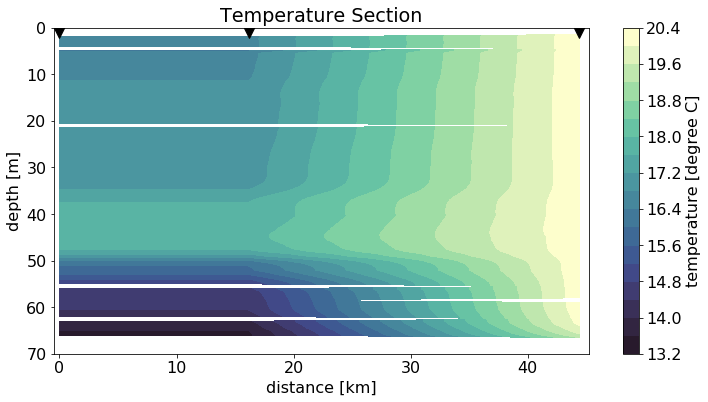

In [337]:
def beautifications(ax):
    ax.plot(ctdsection.distance,ctdsection.distance.size*[0],
             'kv',markersize=20)
    ax.set_ylim(70,0)
    ax.set_xlim(-.5,45.25)
    
fig = plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 16})

ax = fig.add_subplot(111)
ctdsection.temperature.plot.contourf('distance','depth',levels=20,cmap=cmocean.cm.deep_r)
beautifications(ax)

plt.title("Temperature Section")

plt.savefig('Figures/temperaturesection789.png')

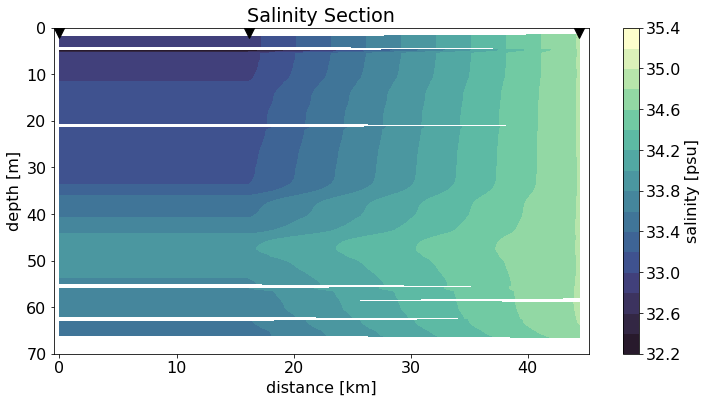

In [338]:
def beautifications(ax):
    ax.plot(ctdsection.distance,ctdsection.distance.size*[0],
             'kv',markersize=20)
    ax.set_ylim(70,0)
    ax.set_xlim(-.5,45.25)
    
fig = plt.figure(figsize=(12,6))
plt.rcParams.update({'font.size': 16})

ax = fig.add_subplot(111)
ctdsection.salinity.plot.contourf('distance','depth',levels=20,cmap=cmocean.cm.deep_r)
beautifications(ax)

plt.title("Salinity Section")

plt.savefig('Figures/salinitysection789.png')